## Data Card link:
- https://www.kaggle.com/datasets/deepak007chaubey/housevalueestimation

## 1.Packages

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from joblib import dump,load

import torch
import torch.nn as nn
import torch.nn.functional as F

## 2.Understand the Dataset
- first check its structure, missing values, and key features

In [76]:
house_value_df = pd.read_csv("ml_house_data_set_updated.csv")
house_value_df.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2721596.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,212968.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,224529.0


In [77]:
print(house_value_df.shape)
columns = house_value_df.columns
l=[]
for col in columns:
    dtype = house_value_df[col].dtype
    nunique = house_value_df[col].nunique()
    null_count = house_value_df[col].isnull().sum()
    l.append([dtype,nunique,null_count])
pd.DataFrame(l,columns=["dtype","nunique","null_count"],index=columns)

(42703, 20)


,dtype,nunique,null_count
year_built,int64,129,0
stories,int64,5,0
num_bedrooms,int64,16,0
full_bathrooms,int64,9,0
half_bathrooms,int64,2,0
livable_sqft,int64,4161,0
total_sqft,int64,4448,0
garage_type,object,3,0
garage_sqft,int64,1134,0
carport_sqft,int64,907,0


## 3.Preprocess the Data
- Handle missing values
- scale features
- encode categorical variables
- Drop unwanted columns

In [78]:
house_value_df["num_of_bathrooms"] = house_value_df.full_bathrooms+house_value_df.half_bathrooms


### 3.1 Handle missing values

- unit_number has 39615 null values so we drop that column
- Drop unwaned columns

In [79]:
house_value_df.drop(columns=["unit_number","carport_sqft","street_name","house_number","city","stories","full_bathrooms","half_bathrooms"],inplace=True)

In [80]:
house_value_df.head(2)

,year_built,num_bedrooms,livable_sqft,total_sqft,garage_type,garage_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,zip_code,sale_price,num_of_bathrooms
0,1978,4,1689,1859,attached,508,True,False,True,True,10907,270897.0,2
1,1958,3,1984,2002,attached,462,True,False,True,True,10907,302404.0,2


### 3.2 catagoricl columns and numarical columns

In [81]:
cat_cols = house_value_df.select_dtypes(include=["object", "bool"]).columns
num_cols = house_value_df.select_dtypes(exclude=["object", "bool"]).columns

C:\Users\USER\AppData\Local\Temp\ipykernel_3752\4048520319.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


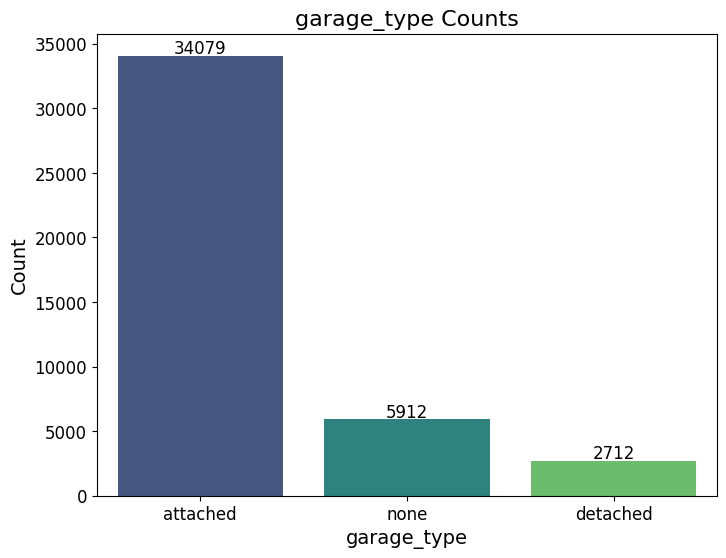

C:\Users\USER\AppData\Local\Temp\ipykernel_3752\4048520319.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


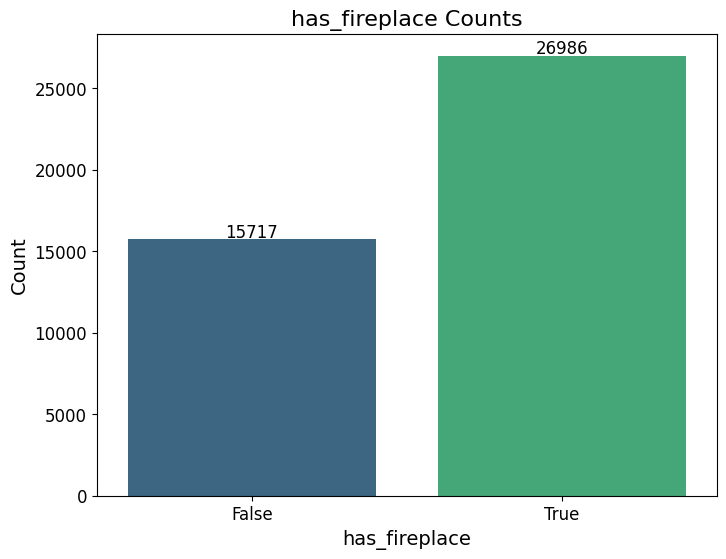

C:\Users\USER\AppData\Local\Temp\ipykernel_3752\4048520319.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


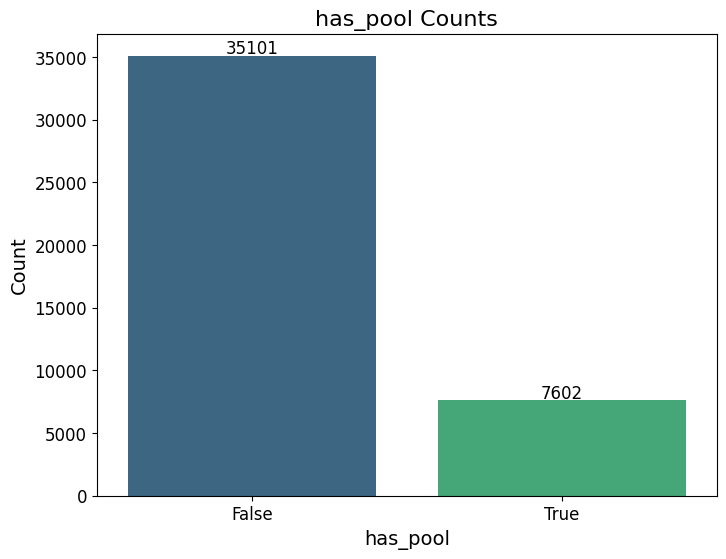

C:\Users\USER\AppData\Local\Temp\ipykernel_3752\4048520319.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


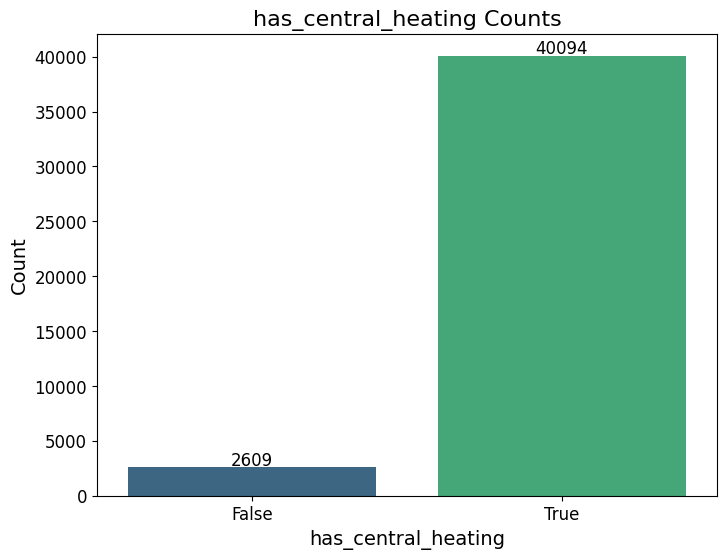

In [82]:
for col in cat_cols[:-1]:
    # Count the occurrences of each category
    category_counts = house_value_df[col].value_counts()

    # Bar plot
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

    # Add count on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title(f'{col} Counts', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

### 3.3 Outlier analysis

In [83]:
house_value_df.head()

,year_built,num_bedrooms,livable_sqft,total_sqft,garage_type,garage_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,zip_code,sale_price,num_of_bathrooms
0,1978,4,1689,1859,attached,508,True,False,True,True,10907,270897.0,2
1,1958,3,1984,2002,attached,462,True,False,True,True,10907,302404.0,2
2,2002,3,1581,1578,none,0,False,False,True,True,11203,2721596.0,2
3,2004,4,1829,2277,attached,479,True,False,True,True,11203,212968.0,2
4,2006,4,1580,1749,attached,430,True,False,True,True,11203,224529.0,2


In [84]:
c_cols = ["livable_sqft","total_sqft","garage_sqft"]

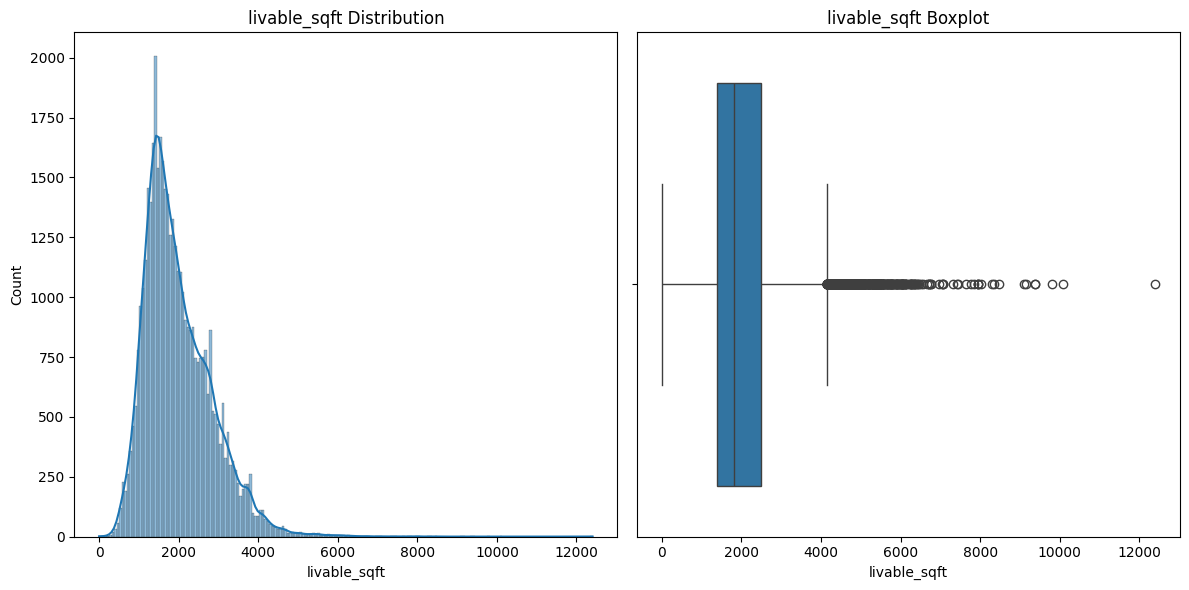

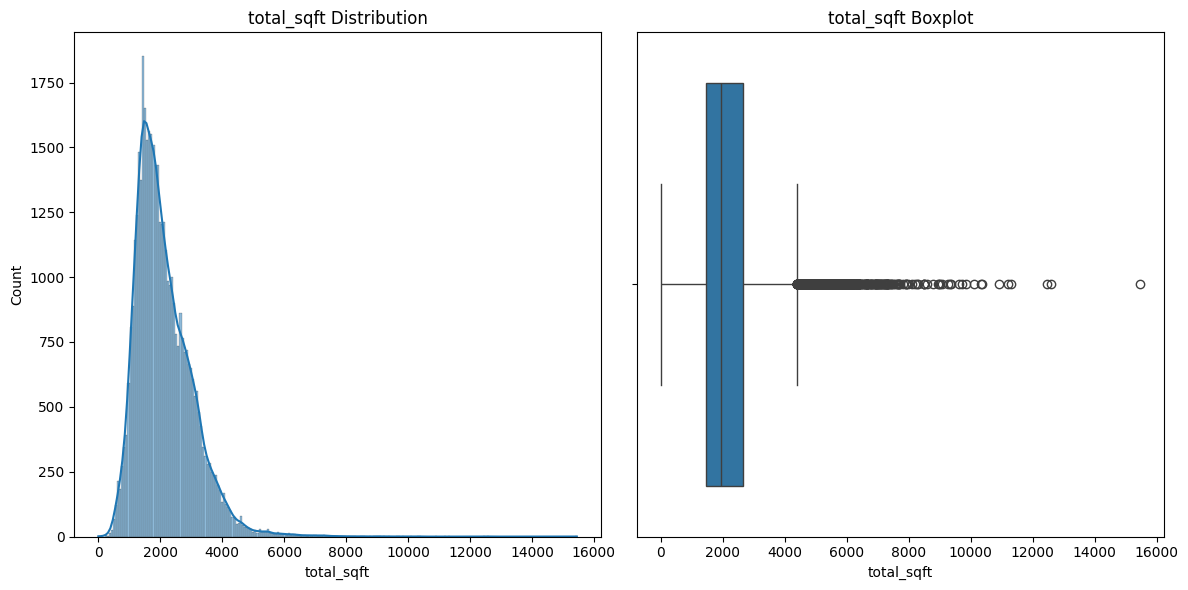

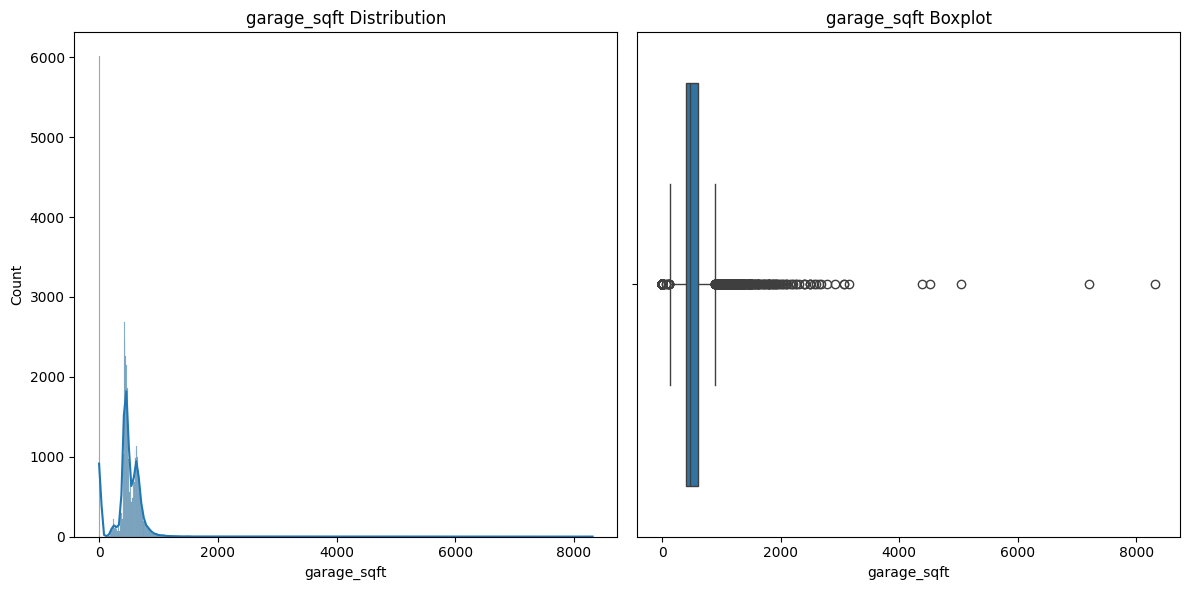

In [85]:
for col in c_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the distribution plot in the first subplot
    sns.histplot(house_value_df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} Distribution')

    # Plot the boxplot in the second subplot
    sns.boxplot(x=house_value_df[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')

    # Display the plots
    plt.tight_layout()
    plt.show()

In [86]:
def remove_outliers_iqr(df, columns):
    for col in columns:
      if col=="carport_sqft":
        pass
      else:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal
house_value_df_cleaned = remove_outliers_iqr(house_value_df,c_cols)

# Check new shape after outlier removal
print("Original Shape:", house_value_df.shape)
print("New Shape after Outlier Removal:", house_value_df_cleaned.shape)
# house_value_df_cleaned = house_value_df.copy()

Original Shape: (42703, 13)
New Shape after Outlier Removal: (35328, 13)


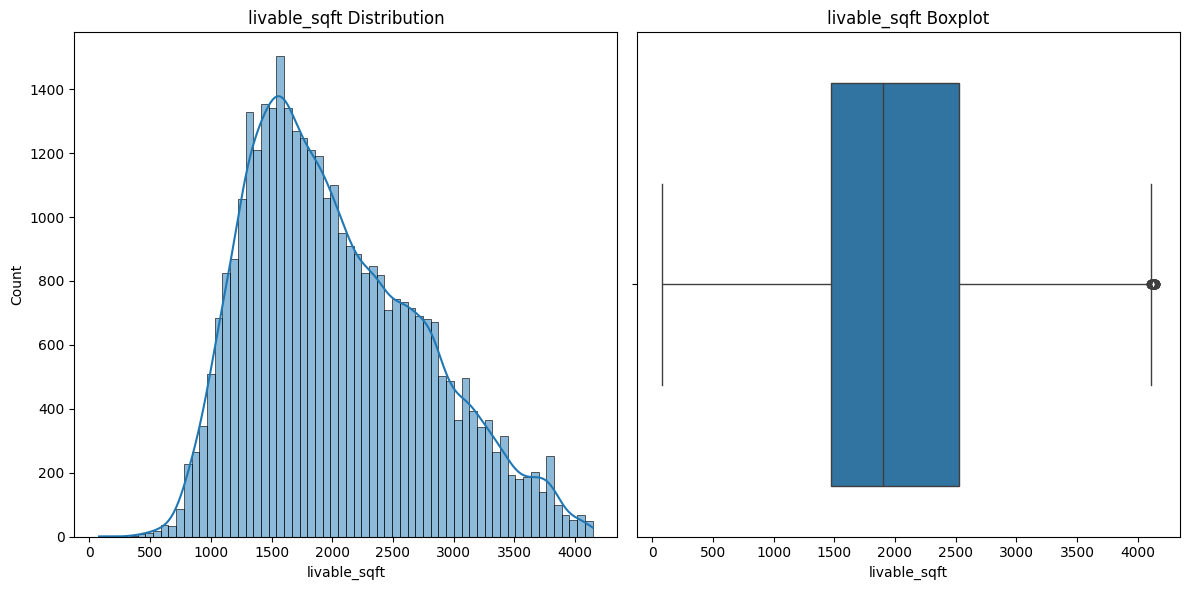

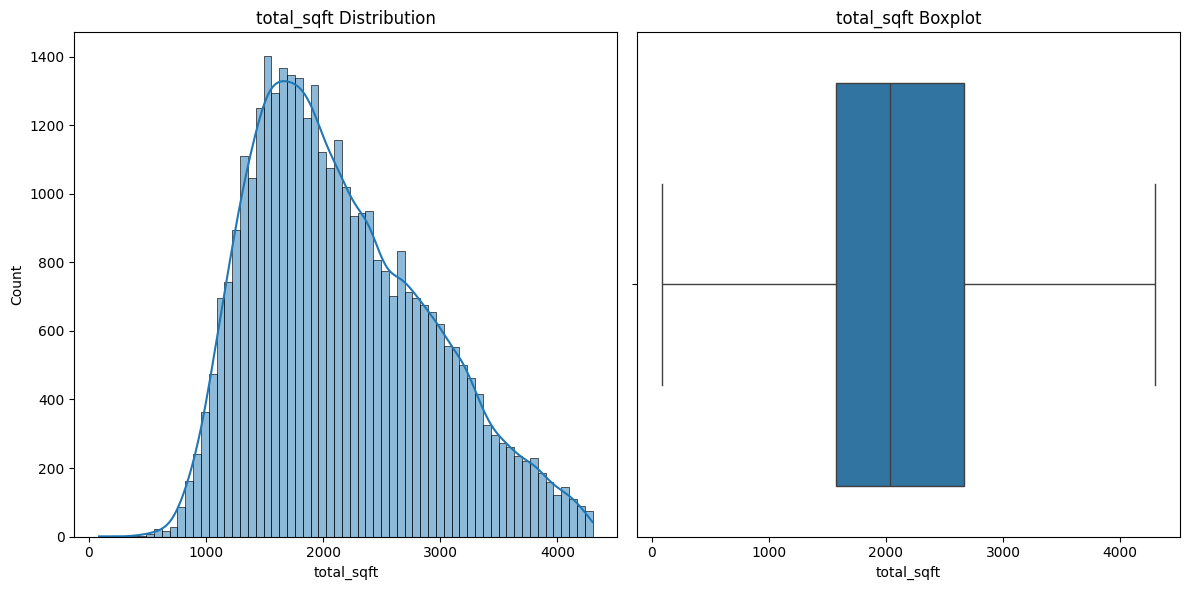

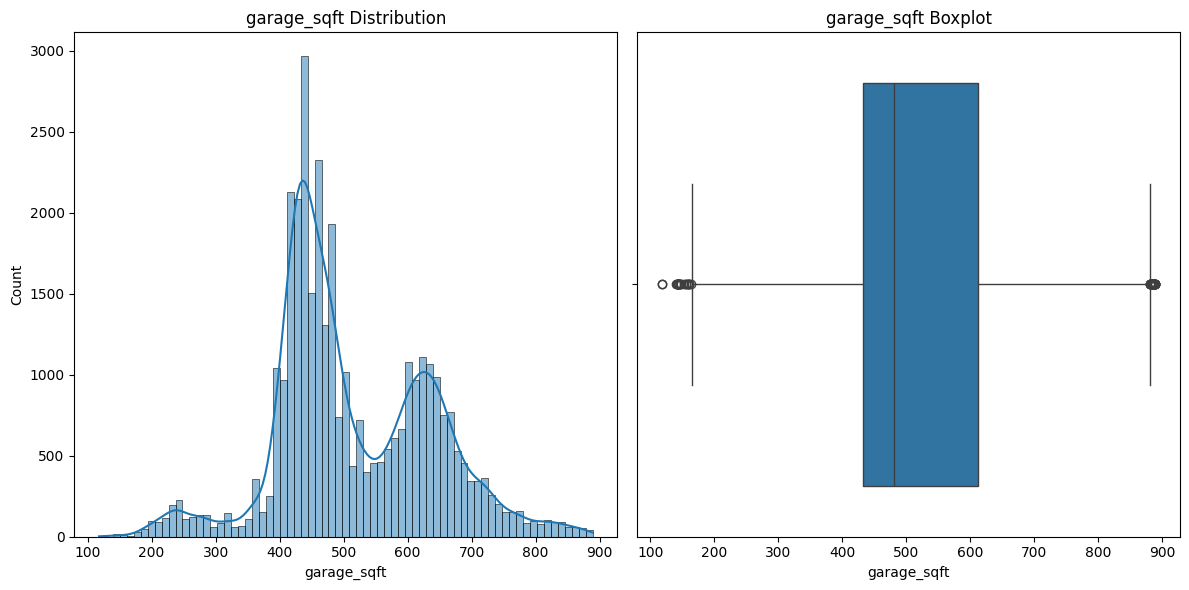

In [87]:
for col in c_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the distribution plot in the first subplot
    sns.histplot(house_value_df_cleaned[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} Distribution')

    # Plot the boxplot in the second subplot
    sns.boxplot(x=house_value_df_cleaned[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')

    # Display the plots
    plt.tight_layout()
    plt.show()

In [88]:
house_value_df_cleaned[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
year_built,35328.0,1993.580078,17.825244,1852.0,1985.0,1999.0,2006.0,2017.0
num_bedrooms,35328.0,3.335400,0.971716,0.0,3.0,3.0,4.0,31.0
livable_sqft,35328.0,2033.152825,719.321246,79.0,1475.0,1905.0,2528.0,4145.0
total_sqft,35328.0,2159.590014,752.955312,87.0,1572.0,2034.0,2670.0,4301.0
garage_sqft,35328.0,514.407354,122.665524,118.0,433.0,481.0,612.0,889.0
zip_code,35328.0,11019.504784,570.617263,10004.0,10537.0,11071.0,11510.0,11989.0
sale_price,35328.0,447762.984828,209139.600686,1260.0,318780.0,420025.0,536494.0,4912487.0
num_of_bathrooms,35328.0,2.512681,0.682516,0.0,2.0,2.0,3.0,8.0


### 3.4 Encode categorical variables

In [ ]:
house_value_df_cleaned["has_fireplace"] = house_value_df_cleaned.has_fireplace.astype(int)
house_value_df_cleaned["has_pool"] = house_value_df_cleaned.has_pool.astype(int)
house_value_df_cleaned["has_central_heating"] = house_value_df_cleaned.has_central_heating.astype(int)
house_value_df_cleaned["has_central_cooling"] = house_value_df_cleaned.has_central_cooling.astype(int)
house_value_df_cleaned["garage_type"] = house_value_df_cleaned.garage_type.map({'attached':2, 'detached':1, 'none':0})

In [90]:
house_value_df_cleaned.head(3)

,year_built,num_bedrooms,livable_sqft,total_sqft,garage_type,garage_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,zip_code,sale_price,num_of_bathrooms
0,1978,4,1689,1859,2,508,1,0,1,1,10907,270897.0,2
1,1958,3,1984,2002,2,462,1,0,1,1,10907,302404.0,2
3,2004,4,1829,2277,2,479,1,0,1,1,11203,212968.0,2


### 3.5 Heatmap

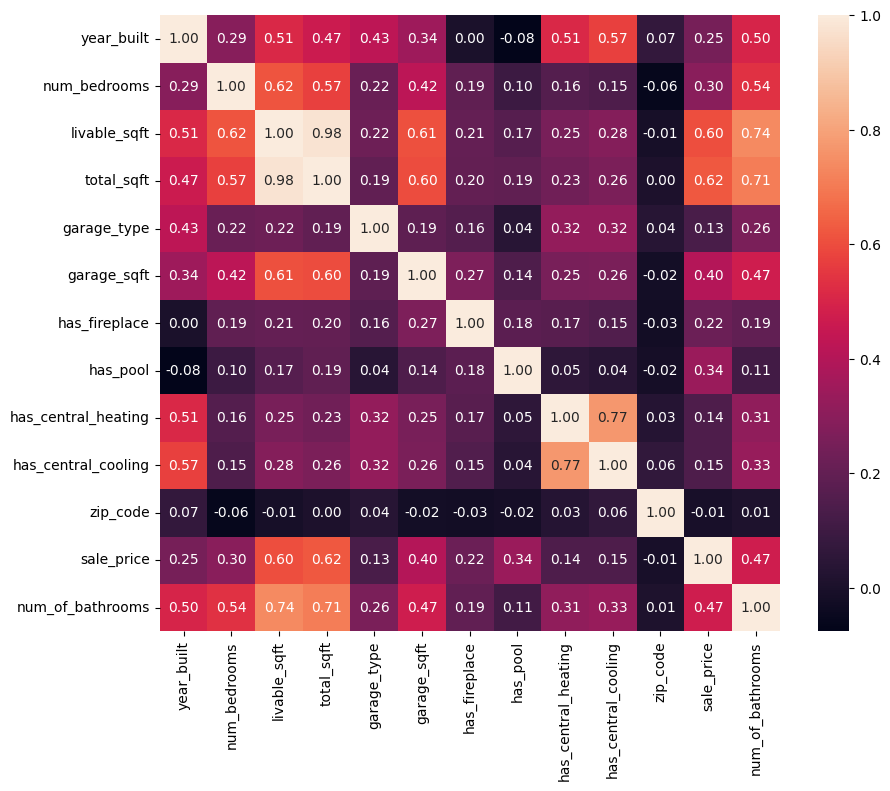

In [91]:
corr = house_value_df_cleaned.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.show()

### 3.6 Train Test Split

In [92]:
X = house_value_df_cleaned.drop(columns=["sale_price","livable_sqft"])
y = house_value_df_cleaned["sale_price"]

In [99]:
X.columns

Index(['year_built', 'num_bedrooms', 'total_sqft', 'garage_type',
       'garage_sqft', 'has_fireplace', 'has_pool', 'has_central_heating',
       'has_central_cooling', 'zip_code', 'num_of_bathrooms'],
      dtype='object')

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.8)
X_train = torch.Tensor(X_train.to_numpy())
X_test = torch.Tensor(X_test.to_numpy())
y_train = torch.Tensor(y_train.to_numpy()).view(-1, 1)
y_test = torch.Tensor(y_test.to_numpy()).view(-1, 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([28262, 11])
torch.Size([28262, 1])
torch.Size([7066, 11])
torch.Size([7066, 1])


## 4.Build the ANN Model
-  Design a neural network architecture using Pytorch.

In [94]:
# Define ANN Model for Regression
class ANN_Model(nn.Module):
    def __init__(self, input_cols=11, hidden0=128, hidden1=128, hidden2=128,hidden3=64,hidden4=64,hidden5=32,hidden6=16, output=1):  # Output=1 for regression
        super().__init__()
        self.f_connected0 = nn.Linear(input_cols, hidden0)
        self.f_connected1 = nn.Linear(hidden0, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.f_connected3 = nn.Linear(hidden2, hidden3)
        self.f_connected4 = nn.Linear(hidden3, hidden4)
        self.f_connected5 = nn.Linear(hidden4, hidden5)
        self.f_connected6 = nn.Linear(hidden5, hidden6)
        self.out = nn.Linear(hidden6, output)

    def forward(self, x):
        x = F.relu(self.f_connected0(x))
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = F.relu(self.f_connected3(x))
        x = F.relu(self.f_connected4(x))
        x = F.relu(self.f_connected5(x))
        x = F.relu(self.f_connected6(x))
        x = self.out(x)
        return x

# Set manual seed
torch.manual_seed(20)
# Create model
model = ANN_Model()

# Define loss function (MSE for regression) and optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 200
final_loss = []

for i in range(epochs):
    y_pred = model(X_train)  # Forward pass
    loss = loss_function(y_pred, y_train)  # Compute loss

    final_loss.append(loss.item())  # Store scalar loss

    if (i + 1) % 20 == 0:  # Print every 10 epochs
        print(f"Epoch {i+1}, Loss: {np.sqrt(loss.item())}")  # RMSE

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 20, Loss: 493070.8533588251
Epoch 40, Loss: 378534.7616269872
Epoch 60, Loss: 217702.49821258368
Epoch 80, Loss: 209071.26960919332
Epoch 100, Loss: 205935.67119855658
Epoch 120, Loss: 203833.63004175734
Epoch 140, Loss: 202070.2578807678
Epoch 160, Loss: 200255.8465962979
Epoch 180, Loss: 198333.80056863732
Epoch 200, Loss: 196260.7454179261


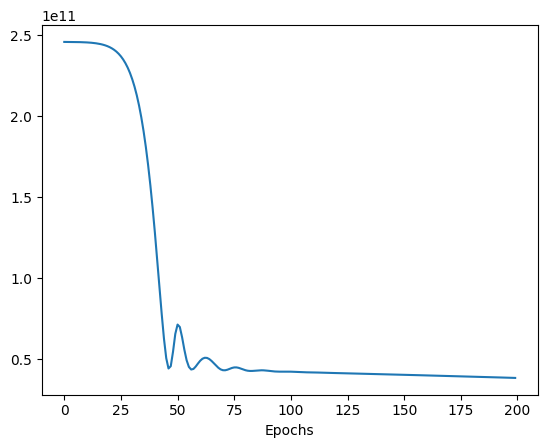

In [95]:
plt.plot(range(epochs),final_loss)
plt.xlabel("Epochs")
plt.show()

## 5.Evaluate Performance
- Check accuracy, loss, and fine-tune hyperparameters.

In [96]:
with torch.no_grad():
  predict = []
  for data in X_test:
    # print(model(data))
    predict.append(model(data))

In [97]:
np.sqrt(mean_squared_error(predict,y_test))

np.float32(180880.34)

## 6.Save Model

In [98]:
torch.save(model.state_dict(),"ANN_model.pth")